In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Files to Load
city_data = "Downloads/city_data.csv"
ride_data = "Downloads/ride_data.csv"

In [5]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [10]:
# Combine the data into a single dataset
combined_data = pd.merge(city_data_df, ride_data_df, how='outer')
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [11]:
# Find city types
combined_data["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Obtain the data frames for the city type(urban_rural,suburban) and then group the data frames by city
urban = combined_data[combined_data["type"] == "Urban"].groupby([combined_data["city"]])
suburban = combined_data[combined_data["type"] == "Suburban"].groupby([combined_data["city"]])
rural = combined_data[combined_data["type"] == "Rural"].groupby([combined_data["city"]])

In [13]:
# Obtain the x and y coordinates for each of the three city types
# x coordinates
urban_x = urban["ride_id"].count()
rural_x = rural["ride_id"].count()
suburban_x = suburban["ride_id"].count()

# y coordinates
urban_y = urban["fare"].mean()
rural_y = rural["fare"].mean()
suburban_y = suburban["fare"].mean()

# Size circle size
urban_s = urban["driver_count"].mean()
rural_s = rural["driver_count"].mean()
suburban_s = suburban["driver_count"].mean()

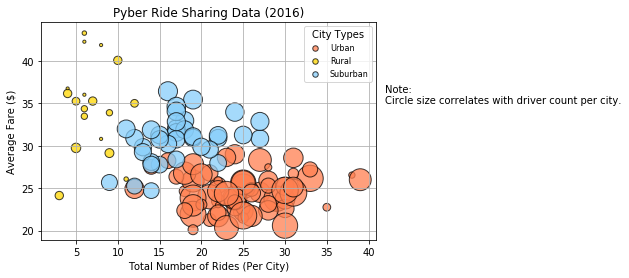

In [14]:
# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, label = "Urban", s=urban_s * 10, color=["coral"],
            edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(rural_x, rural_y, label = "Rural", s=rural_s * 10, color=["gold"],
            edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(suburban_x, suburban_y, label = "Suburban", s=suburban_y  * 10, color=["lightskyblue"],
            edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
# plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()

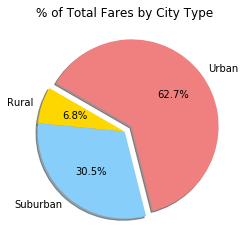

In [16]:
# Calculate Type Percents
type_group= combined_data.groupby(['type'])
fare_sum = type_group['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
# plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()

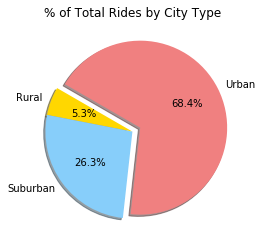

In [17]:
# Calculate Type Percents
rides_count = type_group['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
# plt.savefig("Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()

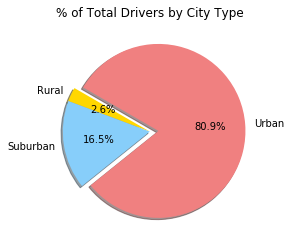

In [21]:
# Calculate Type Percents
type_group = city_data_df.groupby(['type'])
driver_sum = type_group['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(driver_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
# plt.savefig("Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()